In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import bamboolib as bam
bam.enable()

Success: the bamboolib extension was enabled successfully. You can disable it via 'bam.disable()'. You will now see a magic bamboolib button when you display your dataframes, for example via 'df'


### Data Cleaning

In [3]:
# specify the path of the Excel file
excel_file = 'C:\Coursework\Data Minning\Credit_train.xlsx'
# read all sheets into a dictionary of DataFrames
df1 = pd.read_excel(excel_file, sheet_name='HighInt')
df2 = pd.read_excel(excel_file, sheet_name='LowInt')

In [4]:
df_merge =  pd.concat([df1,df2])

In [5]:
df_merge3=df_merge.head(5000)

In [6]:
df_merge4=df_merge.tail(5000)

In [7]:
df_merge1 =  pd.concat([df_merge4,df_merge3])

In [8]:
# EDA

In [9]:
df_merge1.head(10)#studying the dataframe

       Loan Status  Current Loan Amount        Term  Credit Score  \
45000   Fully Paid             99999999   Long Term         659.0   
45001   Fully Paid               475486  Short Term         721.0   
45002  Charged Off               465652   Long Term         687.0   
45003  Charged Off                69960  Short Term        7160.0   
45004   Fully Paid               431904   Long Term         701.0   
45005   Fully Paid               353122   Long Term           NaN   
45006  Charged Off               204116  Short Term         741.0   
45007   Fully Paid               421190   Long Term         655.0   
45008  Charged Off               391732   Long Term           NaN   
45009   Fully Paid               354354   Long Term         740.0   

       Annual Income Years in current job Home Ownership             Purpose  \
45000       866381.0                  NaN           Rent  Debt Consolidation   
45001      1213264.0              2 years           Rent  Debt Consolidation   


In [10]:
# Get an overview of the data
print("Number of rows:", df_merge1.shape[0])
print("Number of columns:", df_merge1.shape[1])

Number of rows: 10000
Number of columns: 18


In [11]:
print("\nFeatures:", df_merge1.columns.tolist()) #understanding number of varibales


Features: ['Loan Status', 'Current Loan Amount', 'Term', 'Credit Score', 'Annual Income', 'Years in current job', 'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History', 'Months since last delinquent', 'Number of Open Accounts', 'Number of Credit Problems', 'Current Credit Balance', 'Maximum Open Credit', 'Interest Rate', 'Bankruptcies', 'Tax Liens']


In [12]:
df_merge1.describe()

       Current Loan Amount  Credit Score  Annual Income   Monthly Debt  \
count         1.000000e+04   8093.000000   8.093000e+03   10000.000000   
mean          1.179744e+07   1063.771284   1.376361e+06   18469.153566   
std           3.182829e+07   1452.317935   8.665216e+05   12098.180977   
min           2.147200e+04    585.000000   8.109200e+04       0.000000   
25%           1.790360e+05    705.000000   8.487680e+05   10327.070000   
50%           3.150730e+05    724.000000   1.182294e+06   16212.225000   
75%           5.277965e+05    740.000000   1.662120e+06   24060.270000   
max           1.000000e+08   7490.000000   1.840017e+07  173265.560000   

       Years of Credit History  Months since last delinquent  \
count             10000.000000                   4771.000000   
mean                 18.271740                     34.952211   
std                   7.032172                     22.171530   
min                   3.700000                      0.000000   
25%          

In [13]:
#cleanning Data
# Drop rows with missing values in the "Bankruptcies" column
df_merge1.dropna(subset=["Bankruptcies"], inplace=True)
#replacing "NA" with 0 for Months sinc elast delinquent
df_merge1["Months since last delinquent"].fillna(0, inplace=True)
# Drop rows with "n/a" values in "Years in current job" column
df_merge1.dropna(subset=["Years in current job"], inplace=True)

In [14]:
df_merge1.describe()

       Current Loan Amount  Credit Score  Annual Income   Monthly Debt  \
count         9.577000e+03   7749.000000   7.749000e+03    9577.000000   
mean          1.183928e+07   1059.176926   1.397055e+06   18714.676284   
std           3.187400e+07   1442.915373   8.730566e+05   12179.480802   
min           2.147200e+04    585.000000   8.109200e+04       0.000000   
25%           1.817420e+05    705.000000   8.621820e+05   10533.980000   
50%           3.217280e+05    724.000000   1.204163e+06   16435.950000   
75%           5.319600e+05    740.000000   1.686744e+06   24368.640000   
max           1.000000e+08   7490.000000   1.840017e+07  173265.560000   

       Years of Credit History  Months since last delinquent  \
count              9577.000000                   9577.000000   
mean                 18.083095                     16.660436   
std                   6.836826                     23.230425   
min                   3.700000                      0.000000   
25%          

In [15]:
#replacing ghe null income and credit score values with the median for the number of years of job experience
df_merge1["Annual Income"] = df_merge1.groupby("Years in current job")["Annual Income"].transform(lambda x: x.fillna(x.median()))
df_merge1["Credit Score"] = df_merge1.groupby("Years in current job")["Credit Score"].transform(lambda x: x.fillna(x.median()))

In [16]:
# Check for duplicates
print("Number of duplicates:",df_merge.duplicated().sum())
# Remove duplicates
df = df_merge1.drop_duplicates()

Number of duplicates: 1184


In [17]:
# Check for duplicates again
print("Number of duplicates after removal:", df.duplicated().sum())
df.describe()

Number of duplicates after removal: 0


       Current Loan Amount  Credit Score  Annual Income   Monthly Debt  \
count         9.571000e+03   9571.000000   9.571000e+03    9571.000000   
mean          1.184653e+07    995.311775   1.360517e+06   18714.458050   
std           3.188268e+07   1304.977933   7.899950e+05   12180.534291   
min           2.147200e+04    585.000000   8.109200e+04       0.000000   
25%           1.817090e+05    711.000000   9.471500e+05   10531.700000   
50%           3.217500e+05    724.000000   1.202263e+06   16448.110000   
75%           5.320920e+05    737.000000   1.533452e+06   24365.980000   
max           1.000000e+08   7490.000000   1.840017e+07  173265.560000   

       Years of Credit History  Months since last delinquent  \
count              9571.000000                   9571.000000   
mean                 18.085320                     16.664194   
std                   6.837286                     23.233931   
min                   3.700000                      0.000000   
25%          

In [18]:
df = df.rename(columns={'Current Loan Amount': 'Current_outstanding_amount'})

In [19]:
print(df.dtypes)

Loan Status                      object
Current_outstanding_amount        int64
Term                             object
Credit Score                    float64
Annual Income                   float64
Years in current job             object
Home Ownership                   object
Purpose                          object
Monthly Debt                    float64
Years of Credit History         float64
Months since last delinquent    float64
Number of Open Accounts           int64
Number of Credit Problems         int64
Current Credit Balance            int64
Maximum Open Credit             float64
Interest Rate                     int64
Bankruptcies                    float64
Tax Liens                       float64
dtype: object


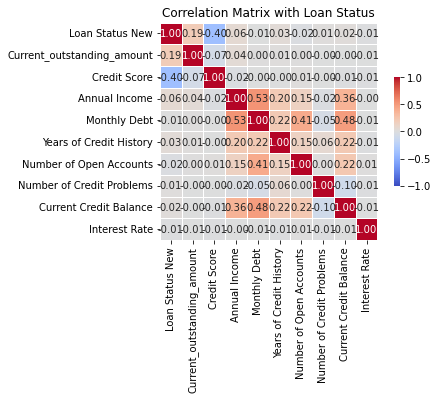

In [20]:
#creating new parameter for loan status
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# convert Loan Status to numeric
df['Loan Status New'] = df['Loan Status'].replace({'Fully Paid': 1, 'Charged Off': 0})
# Select columns for correlation matrix
columns = ['Loan Status New', 'Current_outstanding_amount' , 'Credit Score', 'Annual Income', 'Monthly Debt', 'Years of Credit History','Number of Open Accounts','Number of Credit Problems','Current Credit Balance','Interest Rate']
# Create correlation matrix
corr_matrix = df[columns].corr()
# Generate heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, center=0, square=True, mask=corr_matrix.isnull(), xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns, cbar_kws={"shrink": .5}, annot_kws={"size": 10}, fmt=".2f", linewidths=.5, linecolor='white', cbar=True)
plt.title("Correlation Matrix with Loan Status")
plt.show()
# Show the plot
plt.show()

## DATA ANALYSIS

## Decision Tree

In [21]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
le_Term = LabelEncoder()
df['Term'] = le_Term .fit_transform(df['Term'])

In [22]:
df

       Loan Status  Current_outstanding_amount  Term  Credit Score  \
45001   Fully Paid                      475486     1         721.0   
45002  Charged Off                      465652     0         687.0   
45003  Charged Off                       69960     1        7160.0   
45004   Fully Paid                      431904     0         701.0   
45005   Fully Paid                      353122     0         725.0   
...            ...                         ...   ...           ...   
4995    Fully Paid                    99999999     0         729.0   
4996    Fully Paid                      554620     0         705.0   
4997   Charged Off                      772706     0         599.0   
4998    Fully Paid                      111408     1         720.0   
4999    Fully Paid                      447348     1         714.0   

       Annual Income Years in current job Home Ownership             Purpose  \
45001      1213264.0              2 years           Rent  Debt Consolidation   

In [23]:
corr = df.corr()
import pandas as pd; import numpy as np
corr = corr.reset_index()
corr

                           index  Current_outstanding_amount      Term  \
0     Current_outstanding_amount                    1.000000  0.054139   
1                           Term                    0.054139  1.000000   
2                   Credit Score                   -0.074740 -0.037186   
3                  Annual Income                    0.039298 -0.110400   
4                   Monthly Debt                    0.003572 -0.168918   
5        Years of Credit History                    0.013978 -0.077634   
6   Months since last delinquent                   -0.003155  0.008325   
7        Number of Open Accounts                    0.004847 -0.095981   
8      Number of Credit Problems                   -0.003557  0.028737   
9         Current Credit Balance                   -0.000611 -0.104801   
10           Maximum Open Credit                    0.007458 -0.022011   
11                 Interest Rate                   -0.005481 -0.005085   
12                  Bankruptcies      

In [24]:
### Fitting the decision tree classifier
df = df[['Loan Status','Current_outstanding_amount' , 'Credit Score', 'Annual Income', 'Monthly Debt', 'Years of Credit History','Term']]
df['Loan Status'] = df['Loan Status'].replace({'Fully Paid':0,'Charged Off':1})#Feature selection
df

       Loan Status  Current_outstanding_amount  Credit Score  Annual Income  \
45001            0                      475486         721.0      1213264.0   
45002            1                      465652         687.0      1321355.0   
45003            1                       69960        7160.0       915686.0   
45004            0                      431904         701.0      1038863.0   
45005            0                      353122         725.0      1123071.0   
...            ...                         ...           ...            ...   
4995             0                    99999999         729.0      1360476.0   
4996             0                      554620         705.0      1877637.0   
4997             1                      772706         599.0      1735061.0   
4998             0                      111408         720.0       865868.0   
4999             0                      447348         714.0      2105580.0   

       Monthly Debt  Years of Credit History  Term 

In [32]:
X=df[['Current_outstanding_amount' , 'Credit Score', 'Annual Income', 'Monthly Debt', 'Years of Credit History','Term']]
#Splitting the dataset into training and testing
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3)

In [33]:
from sklearn.preprocessing import LabelEncoder
le_Term = LabelEncoder()
df['Term'] = le_Term .fit_transform(df['Term'])
Y=df[['Loan Status']]

from sklearn import tree
#define classification algorithm
clf_tree = tree.DecisionTreeClassifier(max_depth = 4)
clf_tree = clf_tree.fit(xtrain, ytrain)
y_pred_tree = clf_tree.predict(xtest)

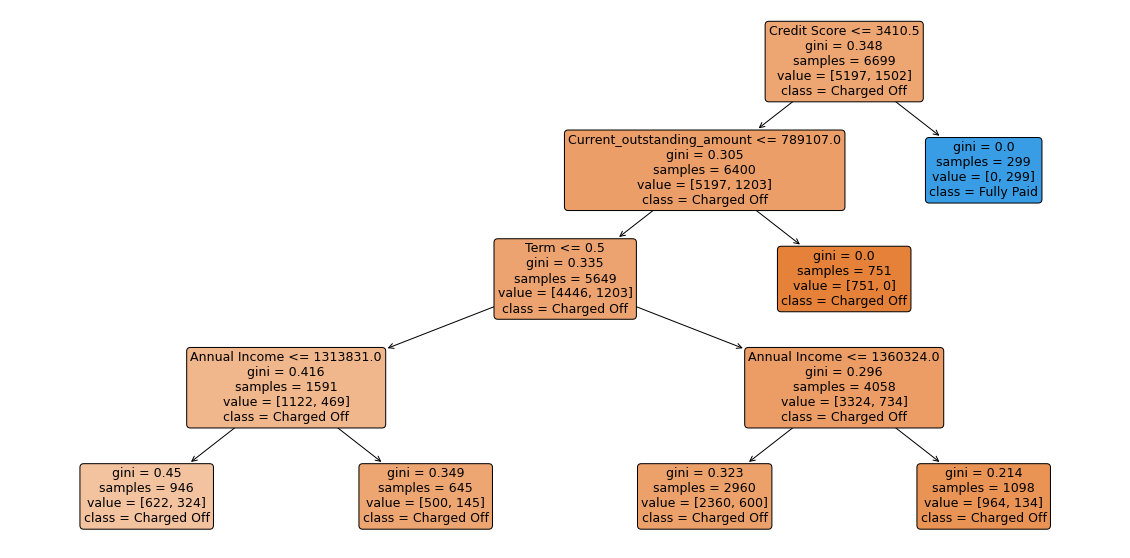

In [34]:
#plotting the decision tree
cols = df.columns
feature_names = cols[~cols.isin(['Loan Status'])].to_list()
class_names = ['Charged Off','Fully Paid']
plt.figure(figsize=(20,10))
tree.plot_tree(clf_tree, filled=True, rounded=True, class_names=class_names, feature_names=feature_names)
plt.show()

In [35]:
#Evaluate the Performance

In [36]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=30,criterion='entropy')
tp = {'max_depth': range(2,10,1)}
from sklearn.model_selection import GridSearchCV
cv=GridSearchCV(dtc,tp,scoring='accuracy',cv=4)
cvmodel=cv.fit(xtrain,ytrain)
md=cvmodel.best_params_['max_depth']
dtc = DecisionTreeClassifier(random_state=30,criterion='entropy',max_depth=md)
model=dtc.fit(xtrain,ytrain)
pred=model.predict(xtest)
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(ytest,pred)#Model Accuracy

0.8262534818941504

[[2257    0]
 [ 499  116]]


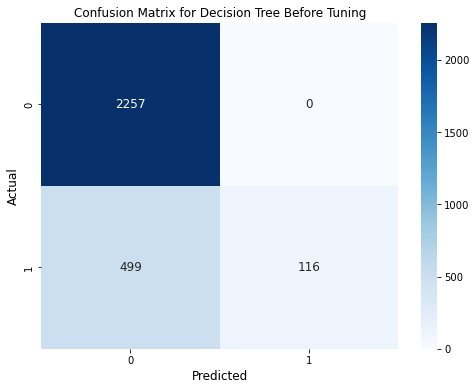

In [37]:
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(ytest,pred)
print(confusion_mat)
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues',annot_kws={"size": 12})
plt.xlabel('Predicted', fontsize = 12)
plt.ylabel('Actual', fontsize = 12)
plt.title('Confusion Matrix for Decision Tree Before Tuning', fontsize = 12)
# Show the plot
plt.show()

In [38]:
#Model Classification
from sklearn.metrics import classification_report
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90      2257
           1       1.00      0.19      0.32       615

    accuracy                           0.83      2872
   macro avg       0.91      0.59      0.61      2872
weighted avg       0.86      0.83      0.78      2872



In [39]:
#Feature Importance

In [40]:
cols_subset = cols[~cols.isin(['Loan Status'])][:6]
feature_imp = pd.Series(clf_tree.feature_importances_, index=cols_subset).sort_values(ascending=False)
feature_imp

Credit Score                  0.772683
Current_outstanding_amount    0.123320
Term                          0.060830
Annual Income                 0.043167
Monthly Debt                  0.000000
Years of Credit History       0.000000
dtype: float64

No handles with labels found to put in legend.


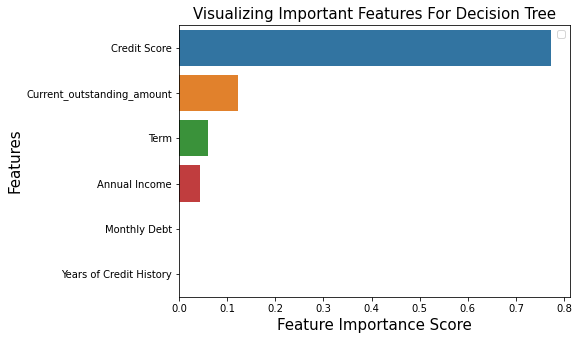

In [41]:
plt.figure(figsize=(7, 5))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score', fontsize = 15)
plt.ylabel('Features', fontsize = 15)
plt.title("Visualizing Important Features For Decision Tree", fontsize = 15)
plt.legend()
plt.show()

In [42]:
#Splitting the dataset into training and testing
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3)

In [43]:
#Feature_importance=pd.Series(importance,columns)
#Feature_importance

In [44]:
#Model Optimization

In [45]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'max_depth': [3, 5, 15],
              'min_samples_split': [2, 2, 2],
              'min_samples_leaf': [2, 4, 2],
              'max_features': ['auto', 'sqrt', 'log2']}

# Create a GridSearchCV object
grid_search_tree = GridSearchCV(clf_tree, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search_tree.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=4),
             param_grid={'max_depth': [3, 5, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 4, 2],
                         'min_samples_split': [2, 2, 2]},
             scoring='accuracy')

In [46]:
df_cv_results_tree = pd.DataFrame(grid_search_tree.cv_results_)
df_cv_results_tree.sort_values(by = 'rank_test_score', inplace = True)
df_cv_results_tree[['param_max_depth','param_min_samples_leaf','param_min_samples_split','rank_test_score']]

   param_max_depth param_min_samples_leaf param_min_samples_split  \
19               3                      2                       2   
18               3                      2                       2   
34               5                      2                       2   
33               5                      2                       2   
39               5                      4                       2   
..             ...                    ...                     ...   
66              15                      4                       2   
78              15                      2                       2   
64              15                      2                       2   
70              15                      2                       2   
75              15                      4                       2   

    rank_test_score  
19                1  
18                1  
34                3  
33                4  
39                5  
..              ...  
66               

In [47]:
#final Model
from sklearn import tree
#define classification algorithm
clf_tree_new = tree.DecisionTreeClassifier(max_depth = 5, min_samples_leaf= 4, min_samples_split= 2)
clf_tree_new = clf_tree_new.fit(xtrain, ytrain)

y_pred_tree_new = clf_tree_new.predict(xtest)

In [48]:
from sklearn.metrics import classification_report
print(classification_report(ytest, y_pred_tree_new ))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90      2249
           1       1.00      0.16      0.28       623

    accuracy                           0.82      2872
   macro avg       0.91      0.58      0.59      2872
weighted avg       0.85      0.82      0.76      2872



[[2159   90]
 [ 597   26]]


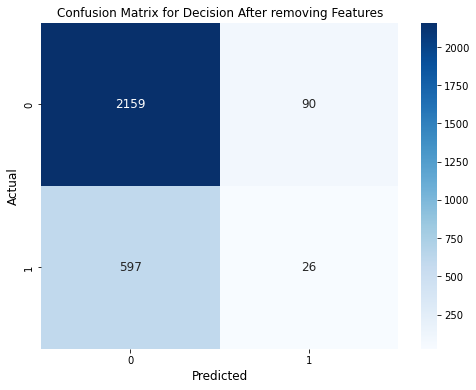

In [49]:
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(ytest,pred)
print(confusion_mat)
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues',annot_kws={"size": 12})
plt.xlabel('Predicted', fontsize = 12)
plt.ylabel('Actual', fontsize = 12)
plt.title('Confusion Matrix for Decision After removing Features', fontsize = 12)
# Show the plot
plt.show()

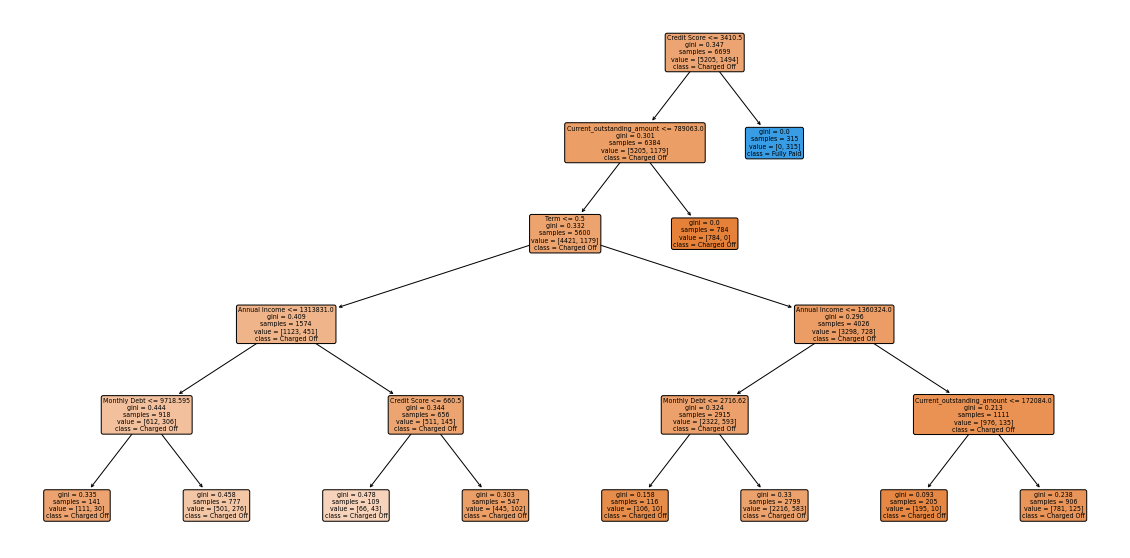

In [50]:
#plotting the decision tree
cols = df.columns
feature_names = cols[~cols.isin(['Loan Status'])].to_list()
class_names = ['Charged Off','Fully Paid']
plt.figure(figsize=(20,10))
tree.plot_tree(clf_tree_new, filled=True, rounded=True, class_names=class_names, feature_names=feature_names)
plt.show()

[[2249    0]
 [ 523  100]]


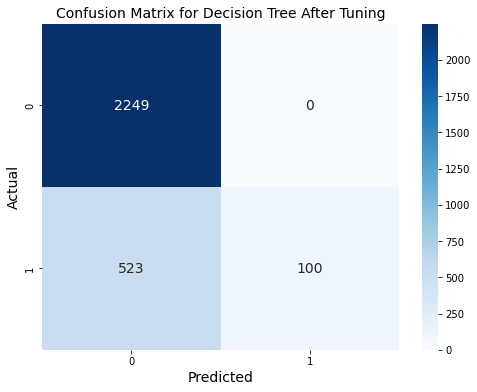

In [51]:
from sklearn.metrics import confusion_matrix
confusion_mat_new = confusion_matrix(ytest, y_pred_tree_new)
print(confusion_mat_new)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_new, annot=True, fmt='d', cmap='Blues',annot_kws={"size": 14})

# Add labels and title
plt.xlabel('Predicted', fontsize = 14)
plt.ylabel('Actual', fontsize = 14)
plt.title('Confusion Matrix for Decision Tree After Tuning', fontsize = 14)

# Show the plot
plt.show()

In [52]:
from sklearn.metrics import classification_report
accuracy_score(ytest, y_pred_tree_new)#Model Accuracy


0.8178969359331476

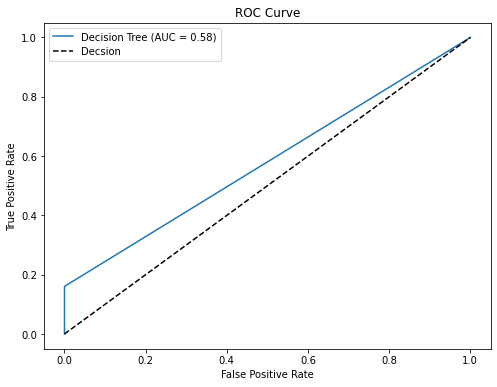

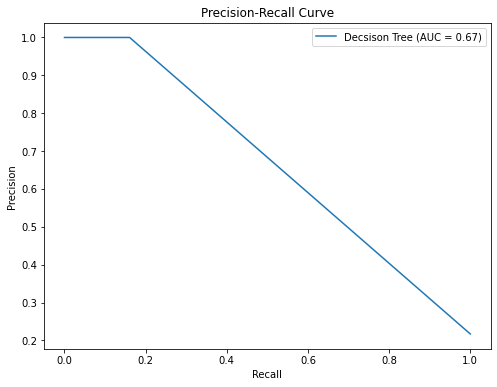

In [53]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, f1_score, auc
import matplotlib.pyplot as plt


# Train dision tree classifier
cvmodel=cv.fit(xtrain,ytrain)
md=cvmodel.best_params_['max_depth']
dtc = DecisionTreeClassifier(random_state=30,criterion='entropy',max_depth=md)
model=dtc.fit(xtrain,ytrain)
pred=model.predict(xtest)

from sklearn.metrics import classification_report

# Calculate ROC curve and AUC
fpr_rf, tpr_rf, _ = roc_curve(ytest, y_pred_tree_new )
roc_auc_rf = roc_auc_score(ytest, y_pred_tree_new )

# Calculate precision-recall curve and AUC
precision_rf, recall_rf, _ = precision_recall_curve(ytest, y_pred_tree_new)
prc_auc_rf = auc(recall_rf, precision_rf)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label='Decision Tree (AUC = {:.2f})'.format(roc_auc_rf))
plt.plot([0, 1], [0, 1], 'k--', label='Decsion')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Plot PRC curve
plt.figure(figsize=(8, 6))
plt.plot(recall_rf, precision_rf, label='Decsison Tree (AUC = {:.2f})'.format(prc_auc_rf))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

### GradientBoosting Method-XGboost

In [54]:
import xgboost as xgb

In [55]:
xgb_clf=xgb.XGBClassifier(max_depth=3,n_estimators=1000,learning_rate=0.6,n_jobs=-1)

In [56]:
xgb_clf.fit(xtrain,ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.6, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [57]:
accuracy_score(ytest,xgb_clf.predict(xtest))

0.7705431754874652

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

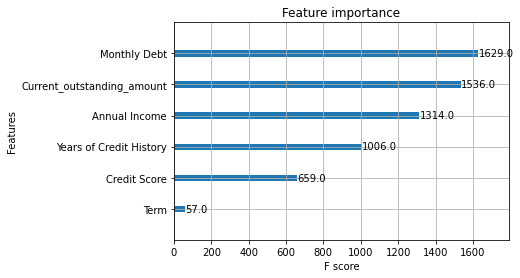

In [58]:
xgb.plot_importance(xgb_clf)

In [59]:
xgb_clf = xgb.XGBClassifier(n_estimators=1000, learning_rate=0.6, random_state=42)

In [60]:
# set XGBoost parameters
param_test1 = {
    'max_depth': range(3,10,2),
    'gamma': [0.1,0.2,0.3],
    'subsample':[0.8,0.9],
    'reg_alpha':[1e-2,0.1,1]
}

In [61]:
grid_search=GridSearchCV(xgb_clf,param_test1,n_jobs=-1,cv=5,scoring='accuracy')

In [97]:
grid_search.fit(xtrain,ytrain)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.6, m...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=1000, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'gamma': [0.1, 0.2, 0.3], 'max_depth': range(3, 10, 2),
                         'reg_alpha': [0.01, 0.1, 1], 'subsample': [0.8, 0.9]},
             scoring='accuracy')

In [98]:
cvxg_clf=grid_search.best_estimator_

In [99]:
accuracy_score(ytest,cvxg_clf.predict(xtest))

0.7705431754874652

In [100]:
grid_search.best_params_

{'gamma': 0.2, 'max_depth': 9, 'reg_alpha': 1, 'subsample': 0.9}

In [101]:
# set XGBoost parameters
param_test2 = {
    'max_depth': range(9),
    'gamma': [0.3],
    'subsample':[0.9],
    'reg_alpha':[0.1]
}

In [102]:
grid_search=GridSearchCV(xgb_clf,param_test2,n_jobs=-1,cv=5,scoring='accuracy')
grid_search.fit(xtrain,ytrain)
accuracy_score(ytest,cvxg_clf.predict(xtest))

0.7705431754874652

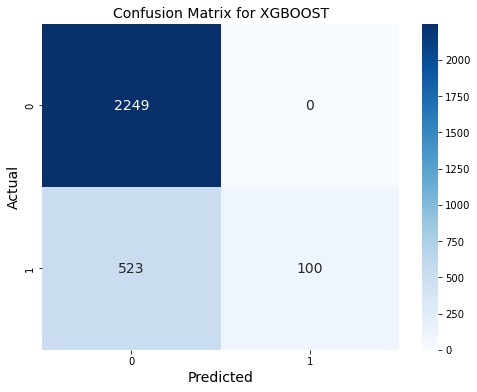

In [103]:
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_new, annot=True, fmt='d', cmap='Blues',annot_kws={"size": 14})

# Add labels and title
plt.xlabel('Predicted', fontsize = 14)
plt.ylabel('Actual', fontsize = 14)
plt.title('Confusion Matrix for XGBOOST', fontsize = 14)

# Show the plot
plt.show()

In [104]:
### Classification Report
from sklearn.metrics import classification_report
print(classification_report(ytest, cvxg_clf.predict(xtest)))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      2249
           1       0.45      0.28      0.35       623

    accuracy                           0.77      2872
   macro avg       0.64      0.59      0.60      2872
weighted avg       0.74      0.77      0.75      2872



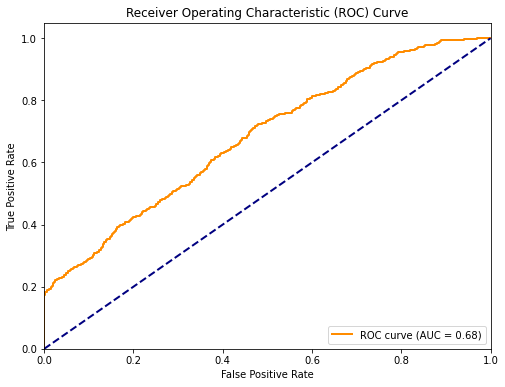

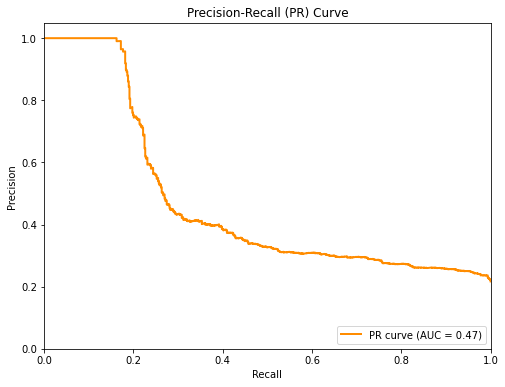

In [105]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve
y_pred_proba = cvxg_clf.predict_proba(xtest)[:,1]
fpr, tpr, _ = roc_curve(ytest, y_pred_proba)
roc_auc = auc(fpr, tpr)
precision, recall, _ = precision_recall_curve(ytest, y_pred_proba)
pr_auc = auc(recall, precision)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label='PR curve (AUC = %0.2f)' % pr_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall (PR) Curve')
plt.legend(loc="lower right")
plt.show()


### GradientBoosting Method-Catboost

In [63]:
from catboost import CatBoostClassifier, Pool
catboost_train_data = Pool(xtrain, ytrain)
clf_cat = CatBoostClassifier(iterations=50, depth=3, learning_rate=0.6,loss_function='MultiClass')
clf_cat.fit(catboost_train_data, plot = True)
y_pred_cat = clf_cat.predict(xtest)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.5170703	total: 206ms	remaining: 10.1s
1:	learn: 0.4647915	total: 208ms	remaining: 4.99s
2:	learn: 0.4467594	total: 227ms	remaining: 3.56s
3:	learn: 0.4376037	total: 229ms	remaining: 2.63s
4:	learn: 0.4334689	total: 230ms	remaining: 2.07s
5:	learn: 0.4290524	total: 232ms	remaining: 1.7s
6:	learn: 0.4268617	total: 233ms	remaining: 1.43s
7:	learn: 0.4255466	total: 235ms	remaining: 1.23s
8:	learn: 0.4247688	total: 236ms	remaining: 1.07s
9:	learn: 0.4236797	total: 238ms	remaining: 952ms
10:	learn: 0.4227392	total: 240ms	remaining: 850ms
11:	learn: 0.4221346	total: 242ms	remaining: 765ms
12:	learn: 0.4211954	total: 243ms	remaining: 692ms
13:	learn: 0.4206495	total: 245ms	remaining: 629ms
14:	learn: 0.4201369	total: 246ms	remaining: 575ms
15:	learn: 0.4182961	total: 248ms	remaining: 527ms
16:	learn: 0.4169730	total: 250ms	remaining: 485ms
17:	learn: 0.4159054	total: 251ms	remaining: 447ms
18:	learn: 0.4155589	total: 253ms	remaining: 413ms
19:	learn: 0.4150253	total: 256ms	remainin

[[2233   16]
 [ 507  116]]


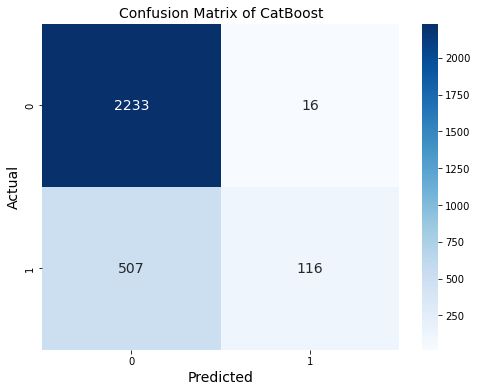

In [64]:
from sklearn.metrics import confusion_matrix
# Generate predictions
ypred_cat = clf_cat.predict(xtest)

# Calculate the confusion matrix
conf_matrix_cat = confusion_matrix(ytest, ypred_cat)

# Print the confusion matrix
print(conf_matrix_cat)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_cat, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 14})

# Add labels and title
plt.xlabel('Predicted', fontsize = 14)
plt.ylabel('Actual', fontsize = 14)
plt.title('Confusion Matrix of CatBoost', fontsize = 14)

# Show the plot
plt.show()

In [65]:
### Classification Report
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_cat))

              precision    recall  f1-score   support

           0       0.81      0.99      0.90      2249
           1       0.88      0.19      0.31       623

    accuracy                           0.82      2872
   macro avg       0.85      0.59      0.60      2872
weighted avg       0.83      0.82      0.77      2872



In [66]:
### Feature Importance
feature_imp_cat = pd.Series(clf_cat.feature_importances_,index=cols[~cols.isin(['Loan Status'])].to_list()).sort_values(ascending=False)[:10]
feature_imp_cat

Credit Score                  49.792216
Current_outstanding_amount    28.380913
Annual Income                  8.193369
Years of Credit History        5.171938
Term                           4.813314
Monthly Debt                   3.648249
dtype: float64

No handles with labels found to put in legend.


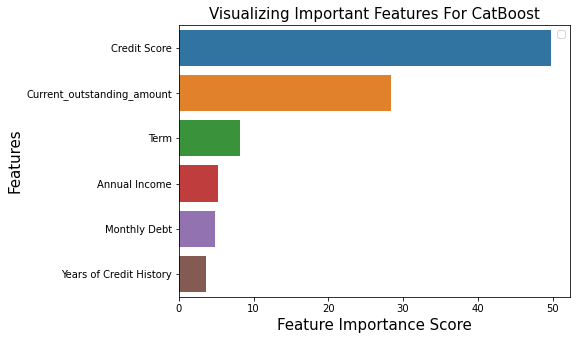

In [67]:
### Plot the Feature Importance
plt.figure(figsize=(7, 5))
sns.barplot(x=feature_imp_cat, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score', fontsize = 15)
plt.ylabel('Features', fontsize = 15)
plt.title("Visualizing Important Features For CatBoost", fontsize = 15)
plt.legend()
plt.show()

In [68]:
from sklearn.model_selection import GridSearchCV
# Define the parameter grid
param_grid = {'iterations': [5, 10, 1],
              'depth': [3, 4, 5],
              'learning_rate': [0.1, 0.3, 0.5]}
# Create a GridSearchCV object
grid_search_cat = GridSearchCV(clf_cat, param_grid, cv=5, scoring='accuracy')
# Fit the GridSearchCV object to the data
grid_search_cat.fit(X,Y)

0:	learn: 0.6536761	total: 1.76ms	remaining: 7.06ms
1:	learn: 0.6204916	total: 3.48ms	remaining: 5.22ms
2:	learn: 0.5940605	total: 5.03ms	remaining: 3.35ms
3:	learn: 0.5703492	total: 6.68ms	remaining: 1.67ms
4:	learn: 0.5517359	total: 8.26ms	remaining: 0us
0:	learn: 0.6541573	total: 1.63ms	remaining: 6.51ms
1:	learn: 0.6199530	total: 3.15ms	remaining: 4.72ms
2:	learn: 0.5928494	total: 4.39ms	remaining: 2.93ms
3:	learn: 0.5697469	total: 5.67ms	remaining: 1.42ms
4:	learn: 0.5497910	total: 7.21ms	remaining: 0us
0:	learn: 0.6541876	total: 1.55ms	remaining: 6.19ms
1:	learn: 0.6203662	total: 3.31ms	remaining: 4.97ms
2:	learn: 0.5933276	total: 4.82ms	remaining: 3.22ms
3:	learn: 0.5708235	total: 6.37ms	remaining: 1.59ms
4:	learn: 0.5507340	total: 8.25ms	remaining: 0us
0:	learn: 0.6544470	total: 1.41ms	remaining: 5.65ms
1:	learn: 0.6209664	total: 2.72ms	remaining: 4.07ms
2:	learn: 0.5941066	total: 4.02ms	remaining: 2.68ms
3:	learn: 0.5716832	total: 5.57ms	remaining: 1.39ms
4:	learn: 0.5516905	t

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x0000025AD31BBA60>,
             param_grid={'depth': [3, 4, 5], 'iterations': [5, 10, 1],
                         'learning_rate': [0.1, 0.3, 0.5]},
             scoring='accuracy')

In [69]:
df_cv_results_cat = pd.DataFrame(grid_search_cat.cv_results_)
df_cv_results_cat.sort_values(by = 'rank_test_score',inplace=True)
df_cv_results_cat[['param_depth','param_iterations','param_learning_rate','rank_test_score']]

   param_depth param_iterations param_learning_rate  rank_test_score
1            3                5                 0.3                1
4            3               10                 0.3                2
2            3                5                 0.5                3
11           4                5                 0.5                4
22           5               10                 0.3                5
23           5               10                 0.5                6
19           5                5                 0.3                7
5            3               10                 0.5                8
14           4               10                 0.5                9
0            3                5                 0.1               10
20           5                5                 0.5               11
3            3               10                 0.1               12
13           4               10                 0.3               13
10           4                5   

In [70]:
#pip install lightgbm

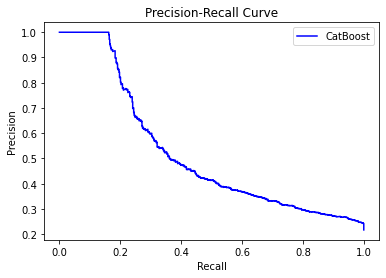

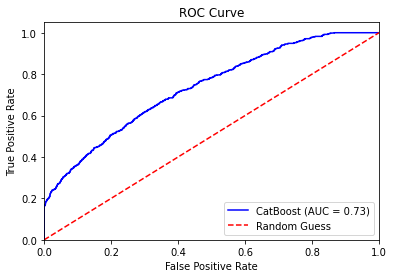

In [71]:
# Get predicted probabilities for the positive class
y_pred_proba = clf_cat.predict_proba(xtest)[:, 1]

# Plot PROC curve
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(ytest, y_pred_proba)

plt.plot(recall, precision, color='blue', label='CatBoost')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Plot ROC curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(ytest, y_pred_proba)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='blue', label='CatBoost (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

### GradientBoosting Method-lightgbm

In [72]:
# Specify the columns to use as features
features = ['Current_outstanding_amount', 'Annual Income', 'Monthly Debt', 'Years of Credit History',
           'Credit Score' ]
X = df[features]
Y = df['Loan Status']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [73]:
import lightgbm as lgb

# Create the LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)

# Set the hyperparameters for LightGBM
params = {'objective': 'binary',
          'boosting_type': 'gbdt',
          'metric': 'binary_logloss',
          'num_leaves': 31,
          'max_depth': -1,
          'learning_rate': 0.05,
          'feature_fraction': 0.9,
          'bagging_fraction': 0.8,
          'bagging_freq': 5,
          'verbose': 0}

# Train the LightGBM model
lgb_classifier = lgb.train(params, train_data, num_boost_round=100)

# Use the trained LightGBM model to make predictions on the test set
y_pred = lgb_classifier.predict(X_test)
y_pred_binary = [1 if x >= 0.5 else 0 for x in y_pred]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000464 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


In [74]:
# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred_binary)
accuracy

0.810933147632312

[[2197   28]
 [ 515  132]]


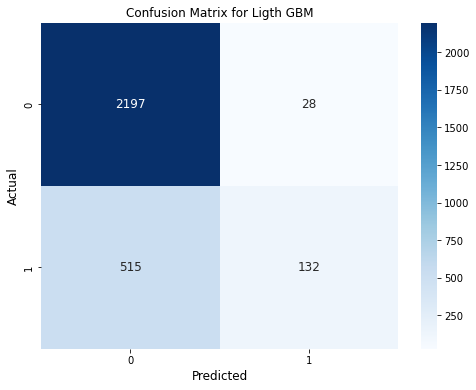

In [75]:
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(y_test,y_pred_binary)
print(confusion_mat)
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues',annot_kws={"size": 12})
plt.xlabel('Predicted', fontsize = 12)
plt.ylabel('Actual', fontsize = 12)
plt.title('Confusion Matrix for Ligth GBM', fontsize = 12)
# Show the plot
plt.show()

In [76]:
### Classification Report
from sklearn.metrics import classification_report
print(classification_report(ytest, y_pred_binary))

              precision    recall  f1-score   support

           0       0.78      0.94      0.86      2249
           1       0.21      0.05      0.09       623

    accuracy                           0.75      2872
   macro avg       0.50      0.50      0.47      2872
weighted avg       0.66      0.75      0.69      2872



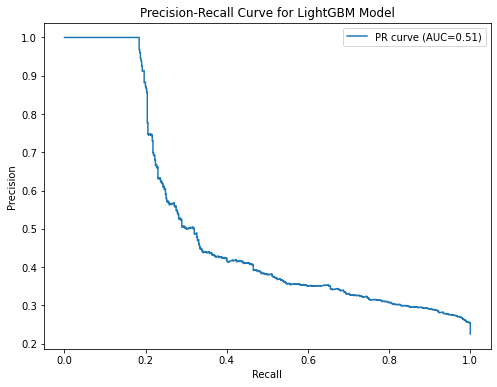

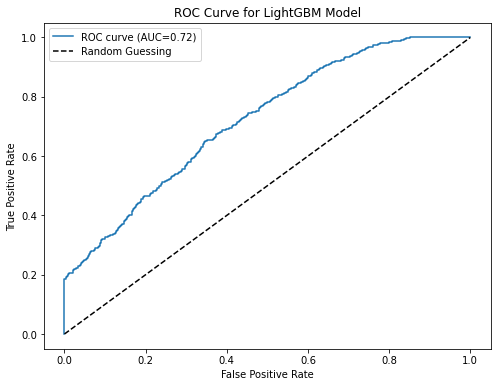

In [77]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc

# Calculate precision, recall, and thresholds for PR curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

# Calculate true positive rate, false positive rate, and thresholds for ROC curve
fpr, tpr, roc_thresholds = roc_curve(y_test, y_pred)

# Calculate area under the PR curve
pr_auc = auc(recall, precision)

# Calculate area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the PR curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR curve (AUC={pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for LightGBM Model')
plt.legend()
plt.show()

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC={roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for LightGBM Model')
plt.legend()
plt.show()


# #Random Forest

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
# Specify the columns to use as features
features = ['Current_outstanding_amount', 'Annual Income', 'Monthly Debt', 'Years of Credit History',
           'Credit Score' ]

X = df[features]
y = df['Loan Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the random forest classifier on the training set
rf_classifier.fit(X_train, y_train)

# Use the trained random forest classifier to make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print('Accuracy:', accuracy)
print('Confusion matrix:\n', confusion)

Accuracy: 0.8099216710182767
Confusion matrix:
 [[1461   34]
 [ 330   90]]


[[1461   34]
 [ 330   90]]


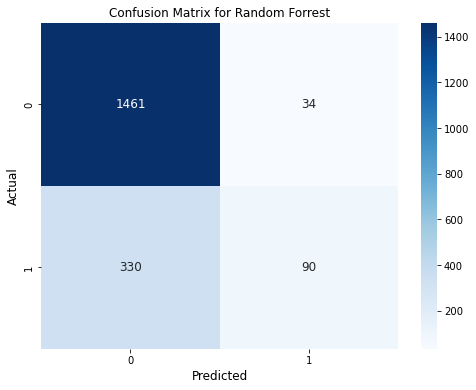

In [80]:
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(y_test,y_pred)
print(confusion_mat)
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues',annot_kws={"size": 12})
plt.xlabel('Predicted', fontsize = 12)
plt.ylabel('Actual', fontsize = 12)
plt.title('Confusion Matrix for Random Forrest', fontsize = 12)
# Show the plot
plt.show()

In [81]:
#classification report 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89      1495
           1       0.73      0.21      0.33       420

    accuracy                           0.81      1915
   macro avg       0.77      0.60      0.61      1915
weighted avg       0.80      0.81      0.77      1915



In [82]:
#feature importance
importances = rf_classifier.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': importances})
feature_importances = feature_importances.sort_values('importance', ascending=False).set_index('feature')
print(feature_importances)

                            importance
feature                               
Credit Score                  0.274284
Current_outstanding_amount    0.216934
Monthly Debt                  0.186884
Years of Credit History       0.164933
Annual Income                 0.156965


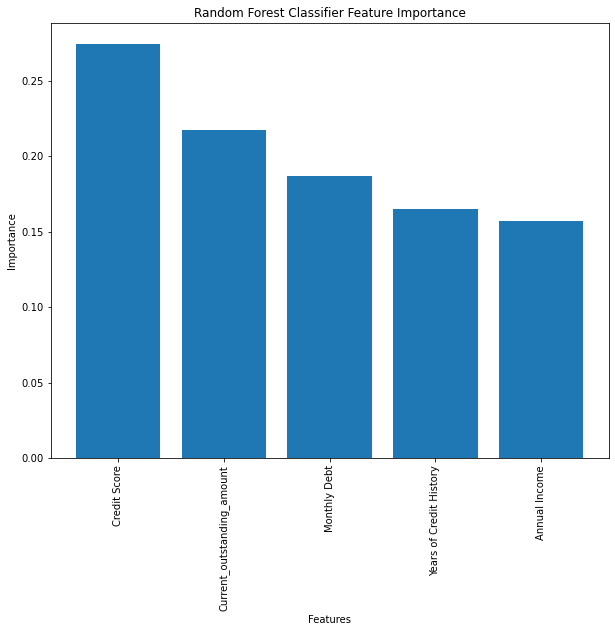

In [83]:
#plotting the feature importance

import matplotlib.pyplot as plt

# Plot the feature importances
plt.figure(figsize=(10,8))
plt.bar(feature_importances.index, feature_importances['importance'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Random Forest Classifier Feature Importance')
plt.show()

In [84]:
#tuning the random forst model

from sklearn.model_selection import RandomizedSearchCV

# Specify the hyperparameter space to search over
param_dist = {"n_estimators": [50, 100, 200],
              "max_features": ['sqrt', 'log2'],
              "max_depth": [10, 20, 30, None],
              "min_samples_split": [2, 5, 10],
              "min_samples_leaf": [1, 2, 4]}


In [88]:
# Create a random forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Create a randomized search object
random_search = RandomizedSearchCV(rf_classifier, param_distributions=param_dist, n_iter=50, cv=5, random_state=42)

# Fit the randomized search object to the data
random_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best hyperparameters: ", random_search.best_params_)

# Use the best hyperparameters to train a new model
best_rf_classifier = RandomForestClassifier(random_state=42, **random_search.best_params_)
best_rf_classifier.fit(X_train, y_train)

Best hyperparameters:  {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10}


RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                       random_state=42)

Accuracy: 0.8224543080939948
Confusion matrix:
 [[1494    1]
 [ 339   81]]


Text(51.0, 0.5, 'Actual')

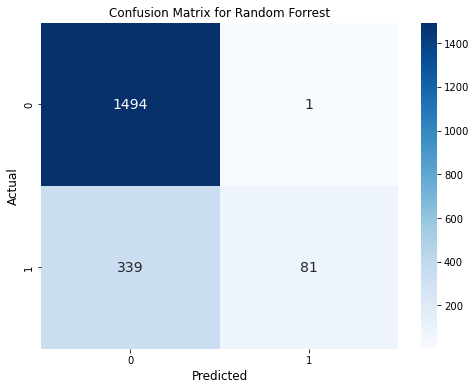

In [89]:
# Use the trained random forest classifier to make predictions on the test set
y_pred = best_rf_classifier.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print('Accuracy:', accuracy)
print('Confusion matrix:\n', confusion)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues',annot_kws={"size": 14})
plt.title('Confusion Matrix for Random Forrest', fontsize = 12)
plt.xlabel('Predicted', fontsize = 12)
plt.ylabel('Actual', fontsize = 12)


In [90]:
#classification report for the random model

from sklearn.metrics import classification_report
y_pred_rs = random_search.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred_rs)
print(report)

              precision    recall  f1-score   support

           0       0.82      1.00      0.90      1495
           1       0.99      0.19      0.32       420

    accuracy                           0.82      1915
   macro avg       0.90      0.60      0.61      1915
weighted avg       0.85      0.82      0.77      1915



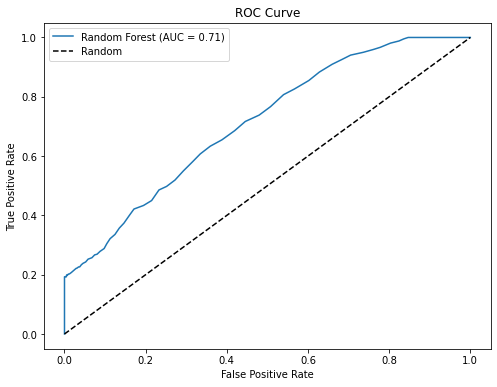

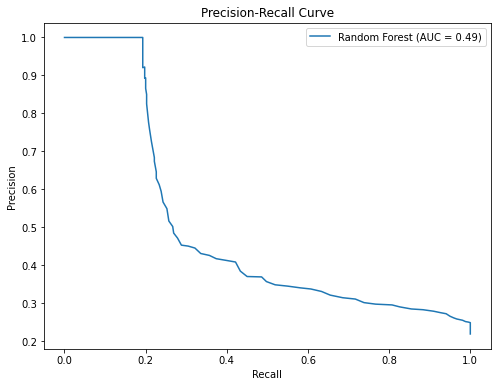

In [91]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, f1_score, auc
import matplotlib.pyplot as plt

# Specify the columns to use as features
features = ['Current_outstanding_amount', 'Annual Income', 'Monthly Debt', 'Years of Credit History',
           'Credit Score' ]

X = df[features]
y = df['Loan Status']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict probabilities for test set
y_pred_prob_rf = rf_classifier.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_prob_rf)

# Calculate precision-recall curve and AUC
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_pred_prob_rf)
prc_auc_rf = auc(recall_rf, precision_rf)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.2f})'.format(roc_auc_rf))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Plot PRC curve
plt.figure(figsize=(8, 6))
plt.plot(recall_rf, precision_rf, label='Random Forest (AUC = {:.2f})'.format(prc_auc_rf))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

### Plotting ROC,PROC, AUC

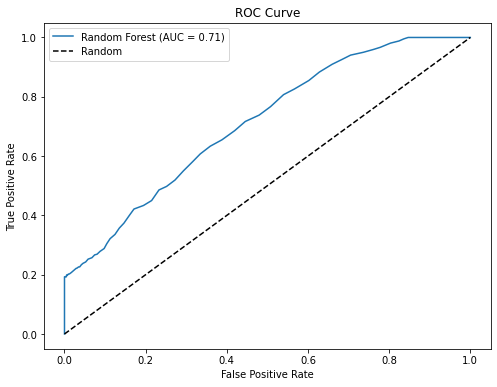

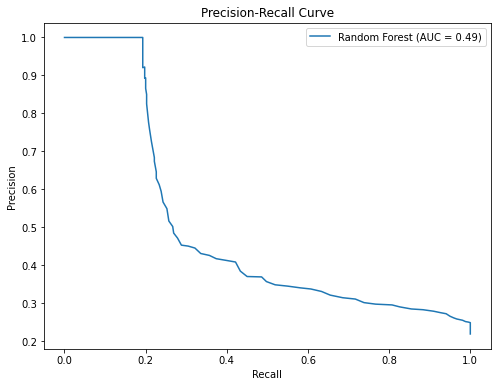

In [92]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, f1_score, auc
import matplotlib.pyplot as plt

# Specify the columns to use as features
features = ['Current_outstanding_amount', 'Annual Income', 'Monthly Debt', 'Years of Credit History',
           'Credit Score' ]

X = df[features]
y = df['Loan Status']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict probabilities for test set
y_pred_prob_rf = rf_classifier.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_prob_rf)

# Calculate precision-recall curve and AUC
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_pred_prob_rf)
prc_auc_rf = auc(recall_rf, precision_rf)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.2f})'.format(roc_auc_rf))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Plot PRC curve
plt.figure(figsize=(8, 6))
plt.plot(recall_rf, precision_rf, label='Random Forest (AUC = {:.2f})'.format(prc_auc_rf))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

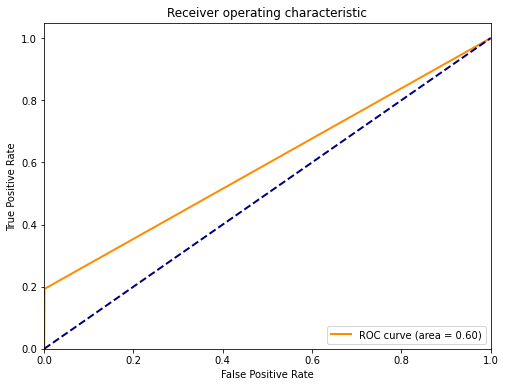

<function matplotlib.pyplot.legend(*args, **kwargs)>

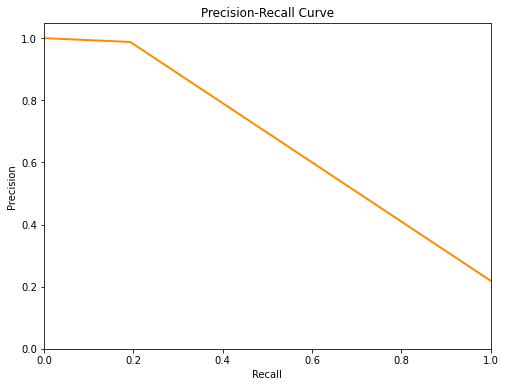

In [93]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# Calculate the false positive rate and true positive rate for ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Calculate the precision and recall for PRC curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Plot PRC curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label='PRC curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend

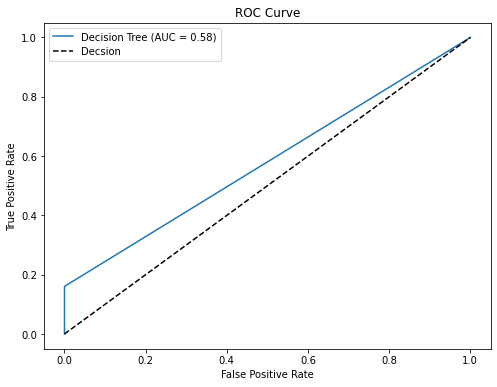

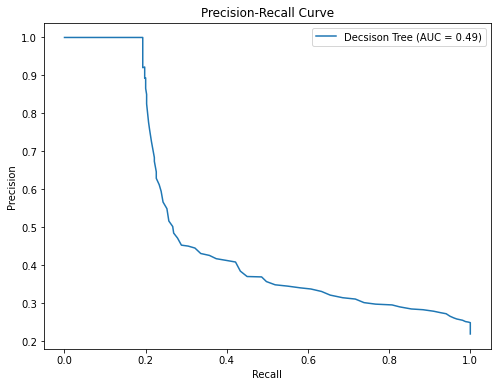

In [94]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, f1_score, auc
import matplotlib.pyplot as plt


# Train dision tree classifier
cvmodel=cv.fit(xtrain,ytrain)
md=cvmodel.best_params_['max_depth']
dtc = DecisionTreeClassifier(random_state=30,criterion='entropy',max_depth=md)
model=dtc.fit(xtrain,ytrain)
pred=model.predict(xtest)

from sklearn.metrics import classification_report

# Calculate ROC curve and AUC
fpr_rf, tpr_rf, _ = roc_curve(ytest, y_pred_tree_new )
roc_auc_rf = roc_auc_score(ytest, y_pred_tree_new )

# Calculate precision-recall curve and AUC
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_pred_prob_rf)
prc_auc_rf = auc(recall_rf, precision_rf)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label='Decision Tree (AUC = {:.2f})'.format(roc_auc_rf))
plt.plot([0, 1], [0, 1], 'k--', label='Decsion')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Plot PRC curve
plt.figure(figsize=(8, 6))
plt.plot(recall_rf, precision_rf, label='Decsison Tree (AUC = {:.2f})'.format(prc_auc_rf))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

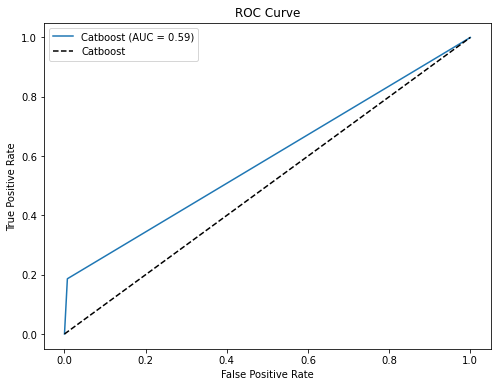

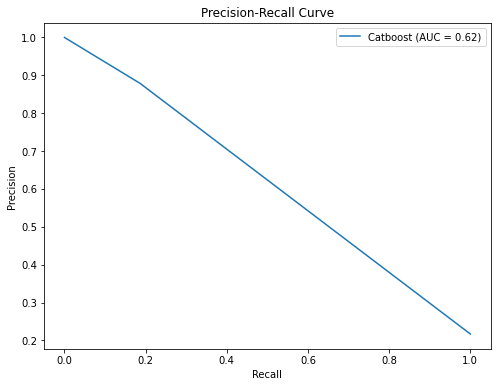

In [95]:
#catBoost

# Predict probabilities for test set
y_pred_prob_rf = rf_classifier.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr_rf, tpr_rf, _ = roc_curve(ytest, ypred_cat)
roc_auc_rf = roc_auc_score(ytest, ypred_cat)

# Calculate precision-recall curve and AUC
precision_rf, recall_rf, _ = precision_recall_curve(ytest, ypred_cat)
prc_auc_rf = auc(recall_rf, precision_rf)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label='Catboost (AUC = {:.2f})'.format(roc_auc_rf))
plt.plot([0, 1], [0, 1], 'k--', label='Catboost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Plot PRC curve
plt.figure(figsize=(8, 6))
plt.plot(recall_rf, precision_rf, label='Catboost (AUC = {:.2f})'.format(prc_auc_rf))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()